In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [27]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution is: True


# Multivariate Linear Regression
Two methods: Numpy and Tensorflow

#### Linear Algebra review
Let <br>
$A$ : 2x2 Matrix <br>
$B$ : 2x1 vector
$$ A\vec{B} = 
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}
\begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix} = 
\begin{bmatrix} a_{11}b_{1} + a_{12}b_{2} \\ a_{21}b_{1} + a_{22}b_{2}  \end{bmatrix}
$$
Example: <br>
$$ 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
\begin{bmatrix} 5 \\ 6 \end{bmatrix} = 
\begin{bmatrix} 17 \\ 39 \end{bmatrix}
$$

*Note, we cannot apply matrix mutiplication if the dimensions does not fit <br>
i.e.
$$ C\vec{D} = 
\begin{bmatrix} c_{11} & c_{12} & c_{13} \\ c_{21} & c_{22} & c_{23} \end{bmatrix}
\begin{bmatrix} d_{1} \\ d_{2} \end{bmatrix} = 
\textbf{NO  BUENO}
$$
<br>
$C$ : 2x3 Matrix <br>
$D$ : 2x1 Vector <br>
$$\text{(2x3 Matrix) x (2x1 Vector)} \neq \text{(3x1 Matrix)}$$ <br>

To correct this, we <i>Transpose</i> the $C$ Matrix
$$ C^{T}D = 
\begin{bmatrix} c_{11} & c_{12}  \\ c_{21} & c_{22} \\ c_{31} & c_{32} \end{bmatrix}
\begin{bmatrix} d_{1} \\ d_{2} \end{bmatrix} = 
\begin{bmatrix} c_{11}d_{1} + c_{12}d_{2} \\ c_{21}d_{1} + c_{22}d_{2} \\ c_{31}d_{1} + c_{32}d_{2} \end{bmatrix}
$$<br>
*Note, values of $c_{ij}$ represent the location of the matrix, not the actual value.

### LinA Notations
$i^{th}$ : index samples of the training set (rows)<br>
$j^{th}$ : feature or dimension  (cols) <br>
where $j=(0,\cdots,n$), $i=(1,\cdots,m)$<br>
Can be represented by $x_{ij}$ or $x_{j}^{(i)}$

Assume we have a dataset with $n$-Features, <br> 
where: <br>
$$
x^{(i)}=
\begin{bmatrix} x_{0}^{(i)} \\ x_{1}^{(i)} \\ \vdots \\ x_{n}^{(i)} \end{bmatrix}
\in \mathbb{R}^{n+1}
$$
<br>
The $\mathbb{R}^{n+1}$ notation means, we have $n$-Features (Dimensions) offset, starting at the $0^{th}$ index instead of the $1^{st}$ index.<br>
Because this is designed that the first column of the dataset are $1$'s. Not actually a feature in the dataset. <br>
*Note: for best practice, assume $x_{0}^{(i)}=1$

And matrix design for $m$-samples, $n$-dimensions <br>
$$ 
X=
\begin{bmatrix} (x^{(1)})^{T} \\ (x^{(2)})^{T} \\ \vdots \\ (x^{(m)})^{T} \end{bmatrix}
$$
<br>
where 
$$(x^{(1)})^{T}=
\begin{bmatrix} x_{0}^{(1)} & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \end{bmatrix}
$$
<br>
Which results in
$$ 
X=
\begin{bmatrix} x_{0}^{(1)} & \cdots & x_{n}^{(1)} \\
\vdots & \ddots & \vdots \\
x_{0}^{(m)} & \cdots & x_{n}^{(m)} \end{bmatrix}
$$

And the other notations <br>
Weights vector, Target label vector, LinReg function respectively:
$$
\theta{}=
\begin{bmatrix} \theta{}_{0} \\ \theta{}_{1} \\ \vdots \\ \theta{}_{n} \end{bmatrix}
\in \mathbb{R}^{n+1} 
\:\:,\:\:
y=
\begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix}
$$ <br><br>
$$
h_{\theta{}}(x) = \theta{}^{T}x = \theta{}_{0}x_{0} + \theta{}_{1}x_{1} + \cdots +\theta{}_{n}x_{n} 
$$ <br><br>
$$ h_{\theta{}}(x^{(i)}) = \theta{}_{0}x_{0}^{(i)} + \theta{}_{1}x_{1}^{(i)} + \cdots +\theta{}_{n}x_{n}^{(i)}  $$ <br><br>
Where the dot product of $\theta{} \cdot x$ is simply:
$$
\theta{}^{T}x=
\begin{bmatrix} \theta{}_{0} & \theta{}_{1} & \cdots & \theta{}_{n} \end{bmatrix}
\begin{bmatrix} x_{0} \\ x_{1} \\ \vdots \\ x_{n} \end{bmatrix}
$$

$$ error = (h_{\theta{}}(x) - y) $$ <br>
$$ errsq = error^2 $$ <br>
Cost function with params $\theta{}=(\theta{}_{0},\cdots,\theta{}_n)$ <br>
$$ \: J(\theta{}) = \frac{1}{2}\sum_{1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)})^{2} $$ <br>

### Multivariate (Matrix form)
$ \theta $  contains the weights, and $ x $ are the features
$$ \vec{\theta} = 
\begin{bmatrix} \theta{}_{0} \\ \theta{}_{1} \\ \theta{}_{2} \end{bmatrix} 
\;\;\; , \;\;\;
X = 
\begin{bmatrix} 1 & x_{11} & x_{12} \\ \vdots & \vdots & \vdots \\ 1 & x_{m1} & x_{m2} \end{bmatrix}
$$
<br><br>
And remeber that $ h_{\theta}(x^{(i)}) =  \theta{}_{0} + \theta{}_{1}x_{1}^{(i)} +\theta{}_{2}x_{2}^{(i)} $ <br>
Where $x_{0} = 1$ <br>
Which the $h_{\theta}(x^{(i)})$ can be written as the resulting $m$ x $1$ Vector


$$
\begin{bmatrix} 
x_{10}& x_{11} & x_{12} \\ \vdots & \vdots & \vdots \\ x_{m0} & x_{m1} & x_{m2}  \end{bmatrix}
\begin{bmatrix} \theta{}_{0} \\ \theta{}_{1} \\ \theta{}_{2} \end{bmatrix} 
= 
\begin{bmatrix} h_{\theta}(x^{(1)}) \\ \vdots \\ h_{\theta}(x^{(m)})  \end{bmatrix} 
$$ 
<br>
you can interpret the $h$ function as the predicted $y$ value
$$\hat{y}^{(1)} = h_{\theta}(x^{(1)})$$ <br>
where it will return the error value when calculating $ :\ (\hat{y}-y)^{(i)}$

And don't forget the error squared term <br>
$$ errsq = (h_{\theta{}}(x^{(i)}) - y^{(i)})^{2} $$ <br>
Recall that the cost function $J(\cdot)$, and the function $h(\cdot)$
$$ \: J(\theta{}) = \sum_{1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)})^{2}  $$ <br>
$$ h_{\theta{}}(x) = \theta{}_{0}x_{0} + \theta{}_{1}x_{1} + \cdots +\theta{}_{n}x_{n}  $$ <br>

Want to apply gradient descent which starts with some random weight $\theta{}_{j}$ <br>
Initialize $\theta{}$ with a arbitary value from $-1$ to $1$ <br>
Then we perform updates for each iteration by finding the partial dertivative of $\theta{}_{j} 
\;\; \forall \;\; j=(0 \rightarrow n)  $; <br>


$$
\frac{\partial{J(\theta)}}{\partial{\theta{}_{j}}} = 
2 \sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x_{j}^{(i)}
$$ <br>
If we are multiplying this by the learning rate $\alpha{}$, then we don't really care about the coefficients because $\alpha$ is a small value <br><br>
So $\frac{1}{2}$ is included to make life easier and added $\frac{1}{m}$ to get the average aka mean, <br><br>
$$
\alpha\frac{1}{2m}\frac{\partial{J(\theta)}}{\partial{\theta{}_{j}}}
=\alpha\sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x_{j}^{(i)}
$$

For Conceptual context, say we have 2 features, looking at the $j^{th}$ index below for $j=(0,1,2)$ <br>
Then for each $\theta{}_{j}$ (These are feature weights),
$$
\theta{}_{0} :=
\theta{}_{0} - \alpha{}\sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x^{(i)}_{0}
$$
$$
\theta{}_{1} :=
\theta{}_{1} - \alpha{}\sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x^{(i)}_{1}
$$
$$
\theta{}_{2} :=
\theta{}_{2} - \alpha{}\sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x^{(i)}_{2}
$$

The weight $\theta{}_{j}$ updates for each iteration where we use the previous $\theta{}_{j}$ value and subtract from $\alpha\frac{\partial{J(\theta)}}{\partial{\theta{}_{j}}}$

Then we want to find the overall mean per update, called <b>batch gradient descent</b> which is where we include the summation of all error term to get the total score per update. <br>
The result, for each update, will shift towards the $\leftarrow$ direction if positive score or $\rightarrow$ if negative score until it converges very close to 0.

# NO MORE PLEASE (ノಠ益ಠ)ノ彡┻━┻
# seE beLOw （。々°）

# Illustration
##### Dataset with two features
1000 samples. Linearally biased

In [3]:
np.random.seed(42)

x_size = 1000
delta = np.random.uniform(-10, 10, x_size)
delta1 = np.random.uniform(-2, 2, x_size)
delta2 = np.random.uniform(-4, 4, x_size)
x1 = np.linspace(2, 6, 1000) + delta1
x2 = np.linspace(4, 8, 1000) + delta2
b_0 = 80 + delta

y = 0.2*(x1) + 0.9*(x2) + b_0
print(b_0.mean())

79.80513106640267


In [4]:
X = np.column_stack((x1, x2))

<IPython.core.display.Javascript object>


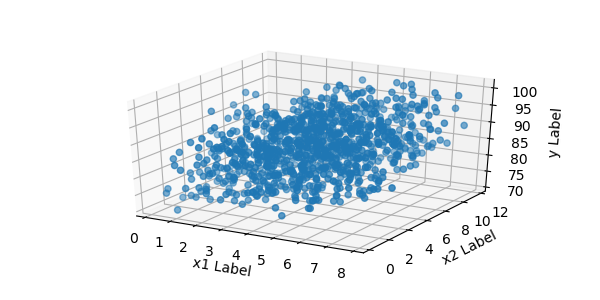

In [28]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, marker='o')

ax.set_xlabel('x1 Label')
ax.set_ylabel('x2 Label')
ax.set_zlabel('y Label')

plt.show()

#### Initialize the weights

In [6]:
np.random.seed(42)
mean = 0.0
stddev = 1.0
w = np.random.normal(mean,stddev,X.shape[1]+1)
print(w)

[ 0.49671415 -0.1382643   0.64768854]


Which is basically the $\vec\theta{}$ vector 
$$ \mathbf{\vec\theta{}} = 
\begin{bmatrix} \theta{}_{0} \\ \theta{}_{1} \\ \theta{}_{2} \end{bmatrix} = 
\begin{bmatrix} 0.496 \\ -0.138 \\ 0.647 \end{bmatrix}
$$

#### Visualizing the dataset 

In [7]:
# First two and the last value of X
print(X[:2])
print(X[-1])

[[0.74053172 2.09364547]
 [2.17160779 1.9798344 ]]
[ 5.1287483  10.97131227]


In [8]:
# First two and the last value of y
print(y[:2])
print(y[-1])

[79.52318964 91.23045864]
89.82004616508783


$$ X=
\begin{bmatrix} 
x_{0}^{(1)} & x_{1}^{(1)} & x_{2}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & x_{2}^{(2)} \\
\vdots & \vdots & \vdots \\ 
x_{0}^{(1000)} & x_{1}^{(1000)} & x_{2}^{(1000)}  \end{bmatrix}
=
\begin{bmatrix} 
1 & 0.740 & 2.093 \\
1 & 2.171 & 1.979 \\
\vdots & \vdots & \vdots \\ 
1 & 5.128 & 10.971  \end{bmatrix}
$$ <br><br>
$$
Y = \begin{bmatrix} y^{(1)} \\  y^{(2)} \\ \vdots \\  y^{(m)} \end{bmatrix}
= \begin{bmatrix} 79.523 \\  91.230 \\ \vdots \\  89.820 \end{bmatrix}
$$

Using the dummy dataset above, and the imaginary $x_{0}$ column which is all $1$'s <br>
The $X$ design matrix is also
<br><br>
$$
X = \begin{bmatrix} (x^{(1)})^{T} \\ (x^{(2)})^{T} \\ \vdots \\ (x^{(m)})^{T} \end{bmatrix}
$$ 
recall where, 
$$(x^{(1)})^{T}=
\begin{bmatrix} x_{0}^{(1)} & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \end{bmatrix}
\;\; ,\;\;
\theta{}=
\begin{bmatrix} \theta{}_{0} \\ \theta{}_{1} \\ \vdots \\ \theta{}_{n} \end{bmatrix}
$$ <br><br>
Writing the $h_{\theta}(x^{(i)})$ format with the variables above,
$$  h_{\theta{}}(x^{(i)}) = \theta{}_{0}x_{0}^{(i)} + \theta{}_{1}x_{1}^{(i)} +\theta{}_{2}x_{2}^{(i)}  $$ <br>
Which $h_{\theta{}}(x^{(i)})$ can be rewritten as,
$$ h_{\theta{}}(x^{(i)}) = (x^{(i)})^{T}\theta{} = X\theta{}$$

The goal is to get it into this format to find the error term as a vector. <br><br>
$$
X\theta{} - Y= 
\begin{bmatrix} h_{\theta}(x^{(1)}) - y^{(1)} \\ h_{\theta}(x^{(2)}) - y^{(2)} \\ \vdots \\ h_{\theta}(x^{(m)}) - y^{(m)} \end{bmatrix} 
$$

### Method 1 : np version

Variables slightly rewritten with the given dataset. $x_{ij}$, where $i=1,2,\cdots, m \;$  and  $\; j=1,2$ <br>
since $x_{0}=1$, it will be replaced with $w_{0}$

the code `np.dot(x, w[1:]) + w[0]` computed on numpy is essentially,
<br><br>
$$
\begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22}  \\ \vdots & \vdots \\ x_{m1} & x_{m2}  \end{bmatrix}
\begin{bmatrix} w_{1} \\ w_{2} \end{bmatrix}
+ w_{0} \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} =
\begin{bmatrix} x_{11}w_{1} + x_{12}w_{2} + w_{0} \\ x_{21}w_{1} + x_{22}w_{2} + w_{0}  \\ \vdots  \\ x_{m1}w_{1} + x_{m2}w_{2} + w_{0}  \end{bmatrix}
$$ <br>
Which is the format that resembles <br>
$$h_{\theta{}}(x^{(i)}) = \theta{}_{0}x_{0}^{(i)} + \theta{}_{1}x_{1}^{(i)} +\theta{}_{2}x_{2}^{(i)}$$ <br>

In [9]:
""" LinReg Activation function,
template lifted from the production/brand-and-performance/util Neural Network constructor """
def prediction(x, w):
    return np.dot(x, w[1:]) + w[0]
def activation(x, w):
    return prediction(x, w)
def errors(x, w, y):
    return (activation(x, w) - y)
def sqerrors(x, w, y):
    return (errors(x, w, y))**2
def loss(x, w, y):
    return np.mean(sqerrors(x, w, y))

The activation function is simply $h_{\theta}(x^{(i)})$, which is the prediction function for the Linear Regression

In [10]:
print("Shape is:",activation(X,w).shape)
print("i=1    prediction:", activation(X,w)[0])
print("i=2    prediction:", activation(X,w)[1])
print("i=1000 prediction:", activation(X,w)[-1])

Shape is: (1000,)
i=1    prediction: 1.750355226585056
i=2    prediction: 1.478774365025015
i=1000 prediction: 6.89358456108529


In [11]:
print("i=1    errors:", errors(X,w,y)[0])
print("i=2    errors:", errors(X,w,y)[1])
print("i=1000 errors:", errors(X,w,y)[-1])

i=1    errors: -77.7728344163316
i=2    errors: -89.75168427879879
i=1000 errors: -82.92646160400254


Review the LinA above if you need a refresher on how to matrix multiply.<br>
i.e. for row 1 of the dataset, see the example below for the full calculation for i=1
<br><br>
$h_{\theta}(x^{(1)}) = (1)(0.49671415) + (0.74053172)(-0.1382643) + (2.09364547)(0.64768854) = 1.750355226585056$ <br>
$errors^{(1)} = 1.750355226585056 - 79.52318964 = -77.7728344163316$

$$ errors = 
X\theta{} - Y=
\begin{bmatrix} 
1 & 0.740 & 2.093 \\
1 & 2.171 & 1.979 \\
\vdots & \vdots & \vdots \\ 
1 & 5.128 & 10.971  \end{bmatrix}
\begin{bmatrix} 0.496 \\ -0.138 \\ 0.647 \end{bmatrix}
-
\begin{bmatrix} 79.523 \\  91.230 \\ \vdots \\  89.820 \end{bmatrix}
$$ <br><br>
$$ errors
= \;\;
\begin{bmatrix} 1.750 \\  1.478 \\ \vdots \\  6.893 \end{bmatrix}
- \begin{bmatrix} 79.523 \\  91.230 \\ \vdots \\  89.820 \end{bmatrix}
= \begin{bmatrix} -77.772 \\  -89.751 \\ \vdots \\  -82.926 \end{bmatrix}
$$

**Note: Numbers are not rounded, I just copied the number stopping at the third decimal <br>

In [12]:
print("i=1    errsq:", sqerrors(X,w,y)[0])
print("i=2    errsq:", sqerrors(X,w,y)[1])
print("i=1000 errsq:", sqerrors(X,w,y)[-1])

i=1    errsq: 6048.613773150134
i=2    errsq: 8055.364830881178
i=1000 errsq: 6876.798034160108


$$ errsq
= \begin{bmatrix} -77.772^{2} \\  -89.751^{2} \\ \vdots \\  -82.926^{2} \end{bmatrix}
= \begin{bmatrix} 6048.613 \\  8055.364 \\ \vdots \\  6876.798 \end{bmatrix}
$$

In [13]:
print('The inital "loss" score: ', loss(X,w,y))

The inital "loss" score:  6790.2590234126355


After each iteration, we update the weight vector $\vec\theta$ so that the loss score gets closer to 0.

$$
\begin{bmatrix} 
1 & 0.740 & 2.093 \\
1 & 2.171 & 1.979 \\
\vdots & \vdots & \vdots \\ 
1 & 5.128 & 10.971  \end{bmatrix}
$$

Recall from above,
$$
\theta{}_{j} :=
\theta{}_{j} - \alpha{}\sum_{i=1}^{m} (h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x^{(i)}_{j}
$$
and for example, let $j=0$ and $i=1,2$
$$errors^{(1)} = h_{\theta}(x^{(1)}) - y^{(1)} = -77.7728344163316$$ <br>
$$errors^{(2)} = h_{\theta}(x^{(2)}) - y^{(2)} = -89.75168427879879$$ <br>
$$\sum_{i=1}^{2}(h_{\theta{}}(x^{(1)}) - y^{(1)}) \; x^{(i)}_{0} 
= −77.7728344163316 \cdot (1) + −89.75168427879879 \cdot (1)$$

And the code `np.dot(X.T, e_)` computed here implies this step $\sum_{i=1}^{m}(h_{\theta{}}(x^{(i)}) - y^{(i)}) \; x^{(i)}_{j}$ <br><br>

$$
\begin{bmatrix} 
1 & 1 & \cdots & 1 \\
0.740 & 2.171 & \cdots & 5.128 \\
2.093 & 1.979 & \cdots & 10.971
\end{bmatrix}
\begin{bmatrix} -77.772 \\  -89.751 \\ \vdots \\  -82.926 \end{bmatrix}
= \text{(3x1 Matrix)}
$$

In [14]:
learning_rate = 0.01
epochs = 10000
display_epoch = 100
temp_w = w.copy()
coef = (-0.5/len(X))
for i in range(epochs):
    e_ = errors(X, temp_w, y)
    deltaw_ = learning_rate * coef * np.dot(X.T, e_) 
    deltab_ = learning_rate * coef * e_.sum()
#     print(deltaw_, deltab_, "sqerr: ", e_)
    temp_w[1:] += deltaw_
    temp_w[0] += deltab_
    if i==0 or i % display_epoch == 0:
        print("Validation loss after epoch {:02d}: {:.3f}".format(i,loss(X, temp_w, y) ))
print("Final Weights B: {:.3f}, W1: {:.3f}, W2: {:.3f}".format(temp_w[0], temp_w[1], temp_w[2]))

Validation loss after epoch 00: 3696.218
Validation loss after epoch 100: 601.834
Validation loss after epoch 200: 541.872
Validation loss after epoch 300: 492.609
Validation loss after epoch 400: 448.452
Validation loss after epoch 500: 408.571
Validation loss after epoch 600: 372.531
Validation loss after epoch 700: 339.960
Validation loss after epoch 800: 310.523
Validation loss after epoch 900: 283.920
Validation loss after epoch 1000: 259.876
Validation loss after epoch 1100: 238.147
Validation loss after epoch 1200: 218.509
Validation loss after epoch 1300: 200.761
Validation loss after epoch 1400: 184.722
Validation loss after epoch 1500: 170.226
Validation loss after epoch 1600: 157.125
Validation loss after epoch 1700: 145.285
Validation loss after epoch 1800: 134.584
Validation loss after epoch 1900: 124.914
Validation loss after epoch 2000: 116.174
Validation loss after epoch 2100: 108.275
Validation loss after epoch 2200: 101.136
Validation loss after epoch 2300: 94.685
Val

# Final Weights B: 79.251, W1: 0.275, W2: 0.934

### Method 2: Tensorflow version

In [15]:
""" Again, template lifted from the production/brand-and-performance/util Neural Network constructor """
def tf_prediction(x, w, b):
    return tf.add(tf.matmul(x,w), b)
def tf_activation(x, w, b):
    return tf_prediction(x, w, b)
def tf_errors(x, w, b, y):
    return (y - tf_activation(x, w, b))
def tf_sqerrors(x, w, b, y):
    return tf.square(tf_errors(x,w,b,y))
def tf_loss(x, w, b, y):
    return tf.reduce_mean(input_tensor=tf_sqerrors(x, w, b, y))

#### For fast execution, float32 or maybe float16. <br> Test own your own.

In [16]:
tf_X = tf.cast(X.copy(), dtype=tf.float32)
tf_w = tf.cast(w, dtype=tf.float32)
tf_w = tf.reshape(tf_w, [3, 1])
tf_y = tf.cast(y, dtype=tf.float32)
tf_y = tf.reshape(tf_y, [len(y), 1])
tf_b = tf.Variable(tf_w[0])
tf_w = tf.Variable(tf_w[1:])

In [17]:
tf_X

<tf.Tensor: id=1, shape=(1000, 2), dtype=float32, numpy=
array([[ 0.74053174,  2.0936456 ],
       [ 2.1716077 ,  1.9798344 ],
       [ 3.4997914 ,  7.2580447 ],
       ...,
       [ 4.267824  ,  6.470295  ],
       [ 4.224215  ,  6.3163605 ],
       [ 5.1287484 , 10.9713125 ]], dtype=float32)>

In [18]:
tf_y.shape

TensorShape([1000, 1])

<br> *Note: $W$, $B$ must be a tensorflow Variable to call GradientTape(), confirm below
<br> &emsp;

In [19]:
tf_b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.49671414], dtype=float32)>

In [20]:
tf_w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.1382643 ],
       [ 0.64768857]], dtype=float32)>

#### Eager execution on gradients
Automatic differentiation makes backpropagation life much easier! <b>No more complicated loops</b>

In [21]:
def grad(X, w,b, y):
    with tf.GradientTape() as tape:
        tf_loss_ = tf_loss(X, w,b, y)
    return tape.gradient(tf_loss_, [w, b])

#### Reached the convergence limit after 3500 iterations using automatic differentiation.

In [22]:
# learning_rate = 0.01
# epochs = 10000
# display_epoch = 100
for e in range(epochs):
    deltaW, deltaB = grad(tf_X,tf_w,tf_b,tf_y)
    change_W = deltaW * learning_rate
    change_B = deltaB * learning_rate
    tf_w.assign_sub(change_W)
    tf_b.assign_sub(change_B)
    if e==0 or e % display_epoch == 0:
        # print(deltaW.numpy(), deltaB.numpy())
        print("Validation loss after epoch {:02d}: {:.3f}".format(e, tf_loss(tf_X,tf_w,tf_b,tf_y)))

print("Final Weights B: {}, W1: {}, W2: {}".format(tf_b, tf_w[0], tf_w[1]))

Validation loss after epoch 00: 984.251
Validation loss after epoch 100: 447.067
Validation loss after epoch 200: 309.515
Validation loss after epoch 300: 217.780
Validation loss after epoch 400: 156.601
Validation loss after epoch 500: 115.799
Validation loss after epoch 600: 88.588
Validation loss after epoch 700: 70.440
Validation loss after epoch 800: 58.337
Validation loss after epoch 900: 50.265
Validation loss after epoch 1000: 44.882
Validation loss after epoch 1100: 41.291
Validation loss after epoch 1200: 38.897
Validation loss after epoch 1300: 37.300
Validation loss after epoch 1400: 36.235
Validation loss after epoch 1500: 35.525
Validation loss after epoch 1600: 35.051
Validation loss after epoch 1700: 34.736
Validation loss after epoch 1800: 34.525
Validation loss after epoch 1900: 34.384
Validation loss after epoch 2000: 34.291
Validation loss after epoch 2100: 34.228
Validation loss after epoch 2200: 34.187
Validation loss after epoch 2300: 34.159
Validation loss after

# Tensorflow Final Weights B: 79.741, W1: 0.212, W2: 0.902

### Comparing the two methods, success!

In [23]:
print("Tensorflow Final Weights B: {:.3f}, W1: {:.3f}, W2: {:.3f}".format(tf_b.numpy()[0], tf_w[0].numpy()[0], tf_w[1].numpy()[0]))
print("Validation loss after epoch {:02d}: {:.3f}".format(e, tf_loss(tf_X,tf_w,tf_b,tf_y)))

Tensorflow Final Weights B: 79.741, W1: 0.212, W2: 0.902
Validation loss after epoch 9999: 34.103


In [24]:
print("Numpy Final Weights B: {:.3f}, W1: {:.3f}, W2: {:.3f}".format(temp_w[0], temp_w[1], temp_w[2]))
print("Validation loss after epoch {:02d}: {:.3f}".format(i,loss(X, temp_w, y) ))

Numpy Final Weights B: 79.251, W1: 0.275, W2: 0.934
Validation loss after epoch 9999: 34.128
